In [2]:
username = "Alex"
env = "integrate"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\" * env * "\\")
include(pathtorepo * "dynamical-systems\\system.jl")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`

rate_jac (generic function with 1 method)

In [3]:
using JLD2, CairoMakie, GLMakie

In [4]:
cd("C:\\Users\\Alex\\Desktop\\dynamical-systems\\")
len = 100
map_dim = " $(len)x$(len) "
name = " γY IE rate_model params from article RK4"
format = ".jld2"
namefile_LSE = "LSE" * map_dim * name * format
namefile_u0s = "u0s" * map_dim * name * format

Λs = load(namefile_LSE)
Λs = Λs["Λs"]
u0s = load(namefile_u0s)
u0s = u0s["u0s"]

γYrange = range( 0.0, 10.0, length = len );
IErange = range(0.0, 2.0, length = len);

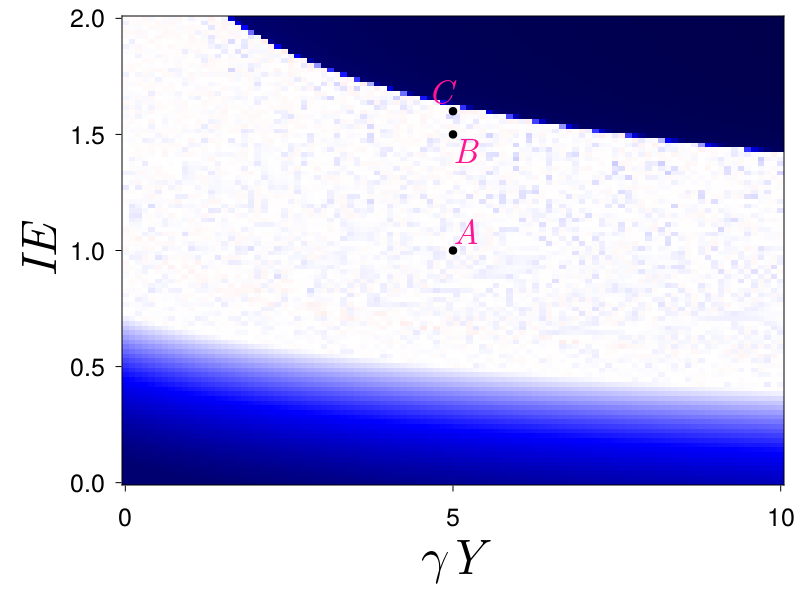

In [16]:
index = 1
absmax = maximum(abs.(Λs[:, :, index]))

mn, mx =  -absmax, absmax

CairoMakie.activate!()
f = Figure()
ticksize = 25
tickpad = 10.0
textsize = 25

ax = Axis(f[1, 1], xlabel = L"γY",ylabel = L"IE", xlabelsize = 50, ylabelsize = 50,
            xticklabelsize = ticksize, yticklabelsize = ticksize,
            xgridvisible  = false, ygridvisible = false,
            xticklabelpad = tickpad, yticklabelpad = tickpad)

hm = heatmap!(ax, γYrange, IErange, Λs[:, :, index],
colormap = :seismic, colorrange = (mn, mx))

scatter!(ax, 5.0, 1.0, markersize = 12.0, color = :black)
text!(ax, 5.0, 1.0, text = L"A", fontsize = 35, color = :deeppink)

scatter!(ax, 5.0, 1.5, markersize = 12.0, color = :black)
text!(ax, 5.0, 1.5, text = L"B", fontsize = 35, align = (:left, :top), color = :deeppink)

scatter!(ax, 5.0, 1.6, markersize = 12.0, color = :black)
text!(ax, 5.0, 1.6, text = L"C", fontsize = 35, align = (:right, :baseline), color = :deeppink)

display(f);

In [38]:
GLMakie.activate!()
display(GLMakie.Screen(), f);

In [49]:
pathtosave = "C:\\Users\\Alex\\Desktop\\rate model\\"
filename = "\\gammaY_IE_params_from_article_RK4.eps"
fullpath = pathtosave * filename 
save(fullpath, f)

CairoMakie.Screen{EPS}
